<a href="https://colab.research.google.com/github/dahouda2pro/Deep-Neural-Network-Using-BO/blob/main/MNN_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from pathlib import Path
from keras.models import model_from_json
import numpy as np
import joblib
import pandas as pd
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from pathlib import Path
import joblib
import tensorflow as tf
import keras.backend as K
from tensorflow.python.ops.gen_math_ops import mod
import keras.utils as image
from PIL import Image
from keras.applications import nasnet, vgg16
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Feature Extraction in Training subset

In [15]:
# Path to folders with training data
copper_path = Path('/content/drive/MyDrive/Mineral_Data_T/Training_data/copper_Images')
cobalt_path = Path('/content/drive/MyDrive/Mineral_Data_T/Training_data/cobalt_Images')


images_T = []
labels_T = []

In [16]:
# Load all the coablt images
for img in cobalt_path.glob("*.png"):
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images_T.append(image_array)

    # For each 'cobalt' image, the expected value should be 0
    labels_T.append(0)

In [17]:
# Load all the copper images
for img in copper_path.glob("*.png"):
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images_T.append(image_array)

    # For each 'copper' image, the expected value should be 1
    labels_T.append(1)

In [18]:
# Create a single numpy array with all the images we loaded
X_train = np.array(images_T)
print(" X train: ", X_train.shape)

# Also convert the labels to a numpy array
y_train = np.array(labels_T)
print(" Labels: ", y_train)
# Normalize image data to 0-to-1 range
#x_train = vgg16.preprocess_input(x_train)
X_train = nasnet.preprocess_input(X_train)
#print(" X train Preprocessed", x_train)
# Load a pre-trained neural network to use as feature extractor
#pretrained_nn = vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
pretrained_nn = nasnet.NASNet(weights="imagenet", include_top=False, input_shape=(331, 331, 3))
#pretrained_nn = nasnet.NASNetLarge(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

 X train:  (200, 331, 331, 3)
 Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
# Extract features for each image (all in one pass)
features_x = pretrained_nn.predict(X_train)
print("Extracted features Shape: " , features_x.shape)

features_2D = features_x.reshape((features_x.shape[0], 11 * 11 * 4032))
print("Extracted features 2D: " , features_2D.shape)

7/7 [==============================] - 167s 23s/step
Extracted features Shape:  (200, 11, 11, 4032)
Extracted features 2D:  (200, 487872)


In [20]:
# Save the array of extracted features to a file
joblib.dump(features_x, "X_train.dat")
# Save the matching array of expected values to a file 
joblib.dump(y_train, "y_train.dat")


# Save the array of extracted features to a file for 2D
joblib.dump(features_2D, "X_train2.dat")
# Save the matching array of expected values to a file 
joblib.dump(y_train, "y_train2.dat")


['y_train2.dat']

2. Feature Extraction in Validation

In [21]:
# Path to folders with training data
copper_path = Path('/content/drive/MyDrive/Mineral_Data/Validation_data/coppers')
cobalt_path = Path('/content/drive/MyDrive/Mineral_Data/Validation_data/cobalts')


images = []
labels = []

In [22]:
# Load all the coablt images
for img in cobalt_path.glob("*.png"):
    # Load the image from disk
    img = tf.keras.utils.load_img(img)

    # Convert the image to numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'cobalt' image, the expected value should be 0
    labels.append(0)

In [23]:
# Load all the copper images
for img in copper_path.glob("*.png"):
    # Load the image from disk
    img = tf.keras.utils.load_img(img)

    # Convert the image to numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'copper' image, the expected value should be 1
    labels.append(1)

In [24]:
# Create a single numpy array with all the images we loaded
X_test = np.array(images)
print(" X train: ", X_test.shape)

# Also convert the labels to a numpy array
y_test = np.array(labels)
print(" Labels: ", y_test)

# Normalize image data to 0-to-1 range
X_test = nasnet.preprocess_input(X_test)

# Load a pre-trained neural network to use as feature extractor
pretrained_nn = nasnet.NASNet(weights="imagenet", include_top=False, input_shape=(331, 331, 3))

# Extract features for each image (all in one pass)
features_x = pretrained_nn.predict(X_test)
print("Extracted features Shape: " , features_x.shape)
features_2D = features_x.reshape((features_x.shape[0], 11 * 11 * 4032))
print("Extracted features 2D: " , features_2D.shape)

 X train:  (100, 331, 331, 3)
 Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
4/4 [==============================] - 84s 18s/step
Extracted features Shape:  (100, 11, 11, 4032)
Extracted features 2D:  (100, 487872)


In [25]:
# Save the array of extracted features to a file
joblib.dump(features_x, "X_test.dat")
# Save the matching array of expected values to a file 
joblib.dump(y_test, "y_test.dat")

# Save the array of extracted features to a file for 2D
joblib.dump(features_2D, "X_test2.dat")
# Save the matching array of expected values to a file 
joblib.dump(y_test, "y_test2.dat")


['y_test2.dat']

3. Feature Extractor Training

In [26]:
# Load the dataset
X_train = joblib.load("X_train.dat")
y_train = joblib.load("y_train.dat")

X_test = joblib.load("X_test.dat")
y_test = joblib.load("y_test.dat")

print("Shape of X train", X_train.shape)
print("Shape of y train", y_train.shape)

print("Shape of X test", X_test.shape)
print("Shape of y test", y_test.shape)

Shape of X train (200, 11, 11, 4032)
Shape of y train (200,)
Shape of X test (100, 11, 11, 4032)
Shape of y test (100,)


In [27]:
# Create a model and add layers
model = Sequential()

model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Visual the neural network structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 487872)            0         
                                                                 
 dense (Dense)               (None, 64)                31223872  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 31,223,937
Trainable params: 31,223,937
Non-trainable params: 0
_________________________________________________________________


In [28]:
# METRICS : taken from old keras source code
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [29]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=METRICS)

In [30]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, shuffle=True)

Epoch 1/150
7/7 [==============================] - 3s 268ms/step - loss: 14.6226 - accuracy: 0.5600 - precision: 0.5500 - recall: 0.6600 - auc: 0.5901 - f1_score: 0.5630 - val_loss: 0.7350 - val_accuracy: 0.9100 - val_precision: 0.9362 - val_recall: 0.8800 - val_auc: 0.9330 - val_f1_score: 0.6955
Epoch 2/150
7/7 [==============================] - 1s 187ms/step - loss: 3.0132 - accuracy: 0.8050 - precision: 0.9178 - recall: 0.6700 - auc: 0.8505 - f1_score: 0.7736 - val_loss: 0.5388 - val_accuracy: 0.9300 - val_precision: 0.9574 - val_recall: 0.9000 - val_auc: 0.9672 - val_f1_score: 0.7075
Epoch 3/150
7/7 [==============================] - 1s 184ms/step - loss: 1.0743 - accuracy: 0.8850 - precision: 0.8598 - recall: 0.9200 - auc: 0.9277 - f1_score: 0.8993 - val_loss: 0.1496 - val_accuracy: 0.9500 - val_precision: 0.9412 - val_recall: 0.9600 - val_auc: 0.9864 - val_f1_score: 0.7177
Epoch 4/150
7/7 [==============================] - 1s 189ms/step - loss: 0.3288 - accuracy: 0.8500 - precisi

In [31]:
# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weight
model.save_weights("model_weights.h5")

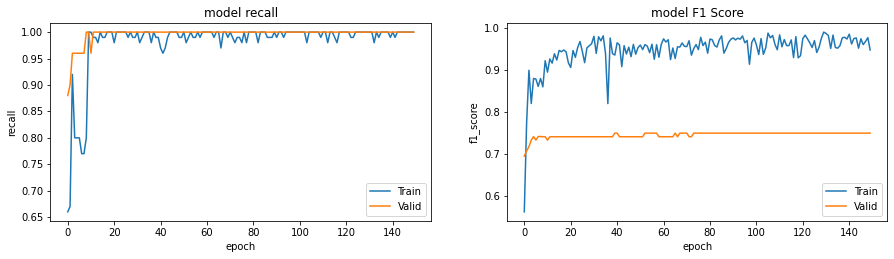

In [32]:
plot = 0
def plot_history(history):
    plt.figure(1, figsize = (15,8))
    plt.subplot(221)
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
    plt.title('model recall')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Valid'])
    plt.subplot(222)
    plt.plot(history.history['f1_score'])
    plt.plot(history.history['val_f1_score'])
    plt.title('model F1 Score')
    plt.ylabel('f1_score')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Valid'])
    plot = 0
    plt.savefig('Recall_F1-Score_'+str(plot)+'.pdf')
    plt.savefig('Recall_F1-Score_'+str(plot)+'.png')
    plot = plot + 1
    plt.show()
        
  # plot the model accuracy and loss results
plot_history(history)

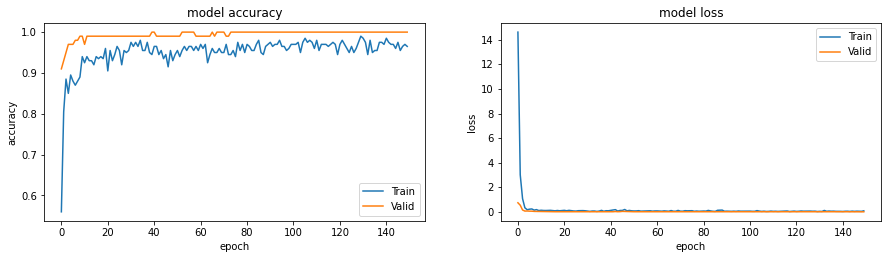

In [33]:
plot = 0
def plot_history(history):
    plt.figure(1, figsize = (15,8))
    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Valid'])
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Valid'])
    plot = 0
    plt.savefig('Loss_Acc_'+str(plot)+'.pdf')
    plt.savefig('Loss_Acc_'+str(plot)+'.png')
    plot = plot + 1
    plt.show()
        
  # plot the model accuracy and loss results
plot_history(history)

4. Detailed NASNet

In [34]:
# Load Pre-trained Model
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [36]:
# Visualizing the Feature Map for the First Convolutional Layer in the NASNETLarge Model for an Input Image

from tensorflow.keras.applications.nasnet import NASNetLarge
from keras.applications.nasnet import preprocess_input


from keras.models import Model
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import expand_dims

# load the model
model = NASNetLarge()

# Redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[2].output)
model.summary()

359748576/359748576 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 331, 331, 3)]     0         
                                                                 
 stem_conv1 (Conv2D)         (None, 165, 165, 96)      2592      
                                                                 
 stem_bn1 (BatchNormalizatio  (None, 165, 165, 96)     384       
 n)                                                              
                                                                 
Total params: 2,976
Trainable params: 2,784
Non-trainable params: 192
_________________________________________________________________


1/1 [==============================] - 0s 71ms/step


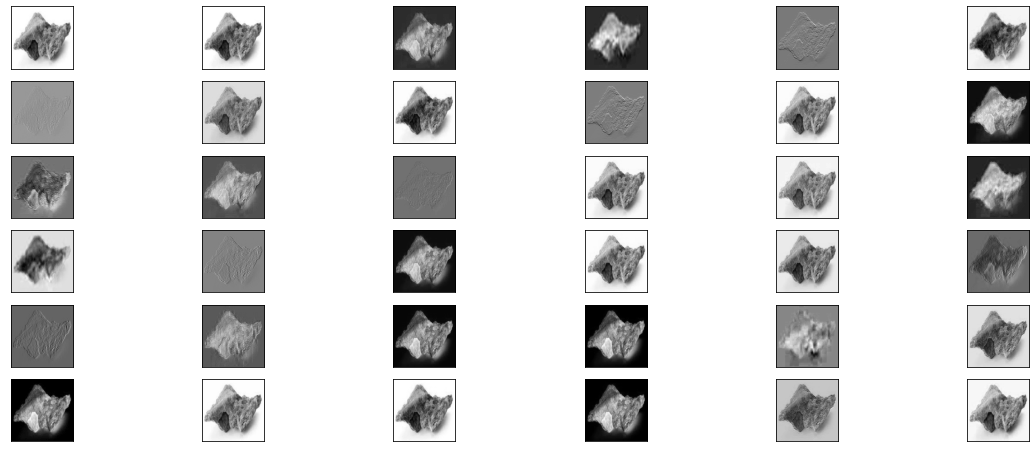

In [37]:
# Load the image with the required shape
img = image.load_img('/content/drive/MyDrive/Mineral_Data_T/Training_data/copper_Images/20220419-141943-657287.png', target_size=(331, 331))

# Convert the image to an array
img = image.img_to_array(img)

# Expand dimensions so that it represents a single sample
img = expand_dims(img, axis=0)

# Prepare the image: scale pixel values for the vgg
img = preprocess_input(img)

# Get feature map for the first hidden layer
feature_maps = model.predict(img)

# Plot all the 64 maps in an 8x8 squares
square = 6
ix = 1
fig = plt.figure(figsize=(20, 8))
for _ in range(square):
    for _ in range(square):
      
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix +=1
# Show the figure

pyplot.show()